### Import dependencies :

In [12]:
import warnings
warnings.filterwarnings("ignore")
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import json
import datetime
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

### Load Data :

In [15]:
df=pd.read_csv('preprocessed_data_.csv')
X=df.drop(columns=['alpha'])
y=df['alpha']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
BOA_train=X_train['BOA_RT']
BOA_test=X_test['BOA_RT']
X_train.drop(columns=['BOA_RT'],inplace=True)
X_test.drop(columns=['BOA_RT'],inplace=True)

In [11]:
df_no=pd.read_csv('/home/fayari/Stage/data_exploration/no_outliers.csv')
df_no

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,g1,Cos(SZA),mu_g,mu_a,muprime_g,muprime_a,mprime_g,mprime_a,BOA_RT,alpha
0,0.984234,0.967931,0.849827,0.595673,0.015892,0.402452,0.239730,81.357114,1137.064781,0.370253,0.946187,0.150275,708.015229,3186.068532,0.154730,0.151289,5.695816,3.743539,429.332315,0.133511
1,0.808703,0.502863,0.971936,0.754977,0.212324,0.116173,0.087708,69.669734,2695.217813,0.364243,0.910936,0.347431,708.188358,3186.847609,0.349206,0.347828,2.122562,0.747097,194.210750,0.363279
2,0.266592,0.973465,0.845395,0.580608,1.322036,0.400463,0.232512,17.550390,1081.897319,0.672173,0.896924,0.953452,708.009100,3186.040949,0.953519,0.953467,0.929959,0.610609,648.404343,0.280041
3,0.830782,0.963485,0.971736,0.270474,0.185388,0.039302,0.010630,44.256621,81.149965,0.775990,0.869940,0.716221,707.897906,3185.540575,0.716701,0.716328,1.382759,1.340499,885.138727,0.125099
4,0.600291,0.839312,0.797427,0.652968,0.510340,0.652287,0.425923,24.480144,932.892398,0.777209,0.878946,0.910105,707.992544,3185.966446,0.910238,0.910135,0.990440,0.689159,602.697524,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,0.765135,0.641704,0.963197,0.825442,0.267702,0.214810,0.177313,22.962506,183.428535,0.740243,0.668902,0.920760,707.909270,3185.591714,0.920877,0.920786,1.064013,0.990855,534.140819,0.364438
362499,0.749872,0.800834,0.842750,0.719020,0.287853,0.608888,0.437803,55.826486,452.874619,0.016449,0.818049,0.561701,707.939208,3185.726437,0.562559,0.561892,1.690357,1.419079,387.264753,0.564494
362500,0.538644,0.788402,0.827843,0.727779,0.618701,0.694040,0.505108,6.365350,423.130196,0.050525,0.896188,0.993835,707.935903,3185.711565,0.993844,0.993837,0.959983,0.814335,476.450471,0.591383
362501,0.634018,0.991370,0.965507,0.661306,0.455678,0.103640,0.068538,7.738936,2006.981168,0.832208,0.860886,0.990892,708.111887,3186.503491,0.990905,0.990895,0.807461,0.369966,1015.811664,-0.093105


In [9]:
df

,Tg_scat,Tg_abs,Ta_abs,SSA,GOD,AOD,AODS,SZA,Z,R_scence,...,mprime_a_bin_2,mprime_a_bin_3,mprime_a_bin_4,mprime_g_bin_0,mprime_g_bin_1,mprime_g_bin_2,mprime_g_bin_3,mprime_g_bin_4,BOA_RT,alpha
0,0.938938,0.830099,-0.143116,0.205274,-0.748201,-0.102195,-0.148214,1.494961,-0.196407,-0.449844,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,429.332315,0.133511
1,0.072507,-1.551574,1.189851,0.880461,-0.191308,-0.932700,-0.652588,1.032032,1.082365,-0.470705,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194.210750,0.363279
2,-2.603383,0.858439,-0.191497,0.141423,2.954771,-0.107965,-0.172161,-1.032376,-0.241683,0.598065,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,648.404343,0.280041
3,0.181490,0.807331,1.187661,-1.173034,-0.267672,-1.155707,-0.908316,0.025438,-1.062994,0.958397,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.138727,0.125099
4,-0.956225,0.171426,-0.715124,0.448112,0.653581,0.622586,0.469534,-0.757894,-0.363971,0.962627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,602.697524,0.320636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362498,-0.142545,-0.840552,1.094456,1.179116,-0.034307,-0.646551,-0.355299,-0.818006,-0.979054,0.834325,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,534.140819,0.364438
362499,-0.217888,-0.025624,-0.220377,0.728064,0.022821,0.496683,0.508949,0.483711,-0.757920,-1.677835,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,387.264753,0.564494
362500,-1.260520,-0.089295,-0.383105,0.765189,0.960787,0.743714,0.732254,-1.475407,-0.782331,-1.559563,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,476.450471,0.591383
362501,-0.789749,0.950134,1.119665,0.483449,0.498611,-0.969059,-0.716191,-1.421001,0.517531,1.153519,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1015.811664,-0.093105


### Load model parameters :

In [3]:
# Load best parameters from JSON file
with open("best_params.json", "r") as f:
    params = json.load(f)

# Build the model
model = Sequential()

# Layer 1
model.add(Dense(params["units1"], activation=params["activation"], input_shape=(X_train.shape[1],)))
model.add(Dropout(params["dropout1"]))

# Layer 2
model.add(Dense(params["units2"], activation=params["activation"]))
model.add(Dropout(params["dropout2"]))

# Layer 3 (if applicable)
if params["n_layers"] >= 3:
    model.add(Dense(params["units3"], activation=params["activation"]))
    model.add(Dropout(params["dropout3"]))

# Layer 4 (if applicable)
if params["n_layers"] == 4:
    model.add(Dense(params["units4"], activation=params["activation"]))
    model.add(Dropout(params["dropout4"]))

# Output layer
model.add(Dense(1))

# Compile model
optimizer = Adam(learning_rate=params["lr"])
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


2025-05-21 15:24:13.406818: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Training :

In [9]:
# 1. Early stopping
early_stop = EarlyStopping(
    monitor='val_mae',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# 2. Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 3. Model checkpoint (save best model)
checkpoint_cb = ModelCheckpoint(
    filepath='deep_model.keras',
    monitor='val_mae',
    save_best_only=True,
    verbose=1
)

# 4. CSV logger (log training history)
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
csv_logger = CSVLogger(f'training_log_{timestamp}.csv')

# Train phase :

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=params["batch_size"],
    callbacks=[early_stop, reduce_lr, checkpoint_cb, csv_logger],
    verbose=1
)


Epoch 1/200


3395/3399 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0291 - mae: 0.1207
Epoch 1: val_mae improved from inf to 0.04759, saving model to deep_model.keras
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - loss: 0.0291 - mae: 0.1207 - val_loss: 0.0045 - val_mae: 0.0476 - learning_rate: 3.4066e-04
Epoch 2/200
3395/3399 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mae: 0.0584
Epoch 2: val_mae improved from 0.04759 to 0.03361, saving model to deep_model.keras
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0064 - mae: 0.0584 - val_loss: 0.0026 - val_mae: 0.0336 - learning_rate: 3.4066e-04
Epoch 3/200
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mae: 0.0426
Epoch 3: val_mae improved from 0.03361 to 0.02569, saving model to deep_model.keras
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - loss: 0.0035 - mae: 0.0426 - val_loss: 0.0016 - val_mae: 0.0257 - learning_rate: 3.4066e-04
Epoch 4/200
3397/3399 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mae: 0.0346
Epoch 4: val

### Evaluation :

In [16]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [17]:
model=load_model('deep_model.keras')
y_pred=model.predict(X_test)

2025-05-28 15:38:13.499206: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


2833/2833 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [18]:
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
print(f'MAE :{MAE}')
print(f'MSE :{MSE}')

MAE :0.004917401324678033
MSE :9.981256933218636e-05


### Prediction VS reality :

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

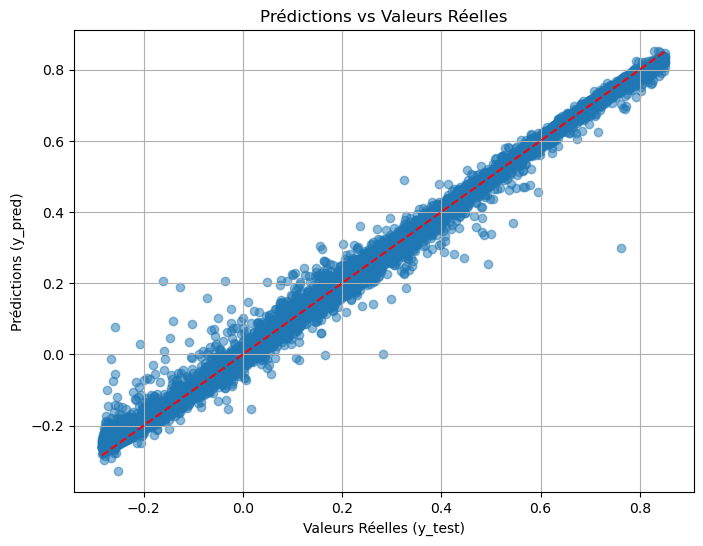

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # ligne parfaite
plt.xlabel('Valeurs Réelles (y_test)')
plt.ylabel('Prédictions (y_pred)')
plt.title('Prédictions vs Valeurs Réelles')
plt.grid(True)
plt.show()

### 2. Distribution des Erreurs (résidus)

In [24]:
y_test.to_numpy().flatten()

array([-0.2242562 ,  0.37668013,  0.23890169, ...,  0.14995195,
        0.14343073,  0.2290811 ])

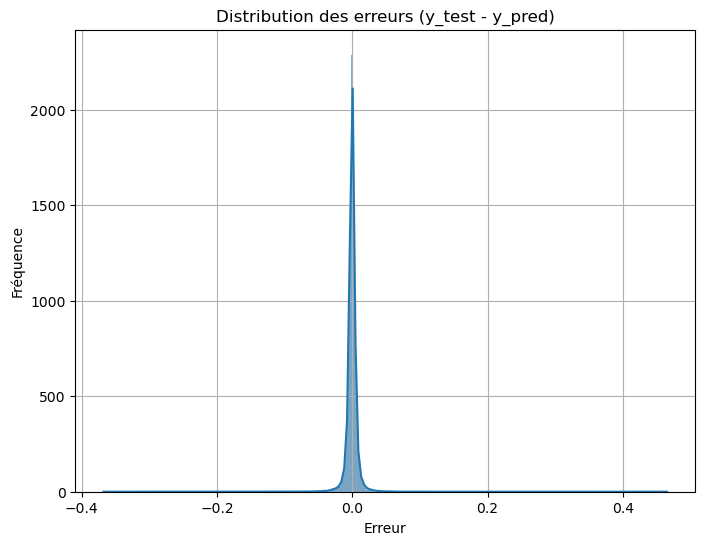

In [26]:
y_true = y_test.to_numpy().flatten()
y_pred_flat = y_pred.flatten()

erreurs = y_true - y_pred_flat

plt.figure(figsize=(8, 6))
sns.histplot(erreurs, kde=True)
plt.title("Distribution des erreurs (y_test - y_pred)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

### Distribution Plot :

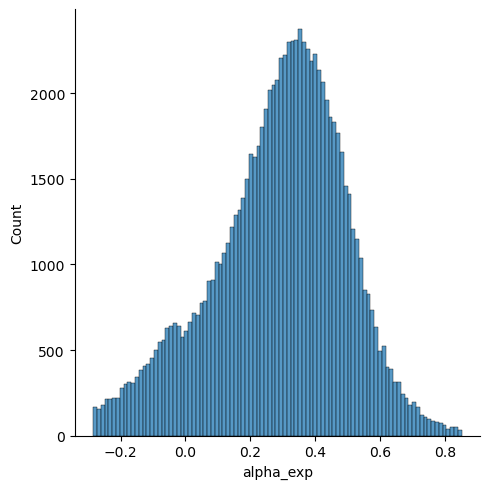

In [16]:
sns.displot(y_test)

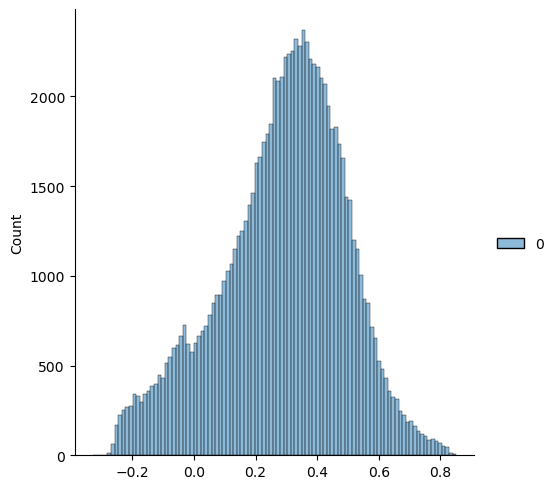

In [27]:
sns.displot(y_pred)

In [1]:
from tensorflow.keras.models import load_model

model=load_model('deep_model.keras')
model.save('deep_model.h5')

2025-05-23 14:50:38.807905: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 14:50:38.823614: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-23 14:50:38.845332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748004638.878204 1856927 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748004638.888728 1856927 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748004638.917060 1856927 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
model.save_weights("deep_model.weights.h5")